In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [16]:
# Load dataset (replace with actual dataset)
df = pd.read_csv('/content/OTT_Consumer_Segmentation.csv')

In [17]:
# Display basic info
print("Dataset Info:\n", df.info())
print("\nSummary Statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   User_ID                   1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Region                    1000 non-null   object
 4   Watch_Time_per_Week       1000 non-null   int64 
 5   Preferred_Genre           1000 non-null   object
 6   Subscription_Type         1000 non-null   object
 7   Binge_Watching_Frequency  1000 non-null   object
 8   Platform_Usage            1000 non-null   object
 9   Monthly_Spending          1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.3+ KB
Dataset Info:
 None

Summary Statistics:
            User_ID          Age  Watch_Time_per_Week  Monthly_Spending
count  1000.000000  1000.000000          1000.000000        1000.00000
mean    500

In [18]:
# Handle missing values
df.dropna(inplace=True)

In [19]:
# Selecting numeric features for clustering
numerical_cols = df.select_dtypes(include=['number']).columns
data = df[numerical_cols]

In [20]:
# Standardizing data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [21]:
# K-Means Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

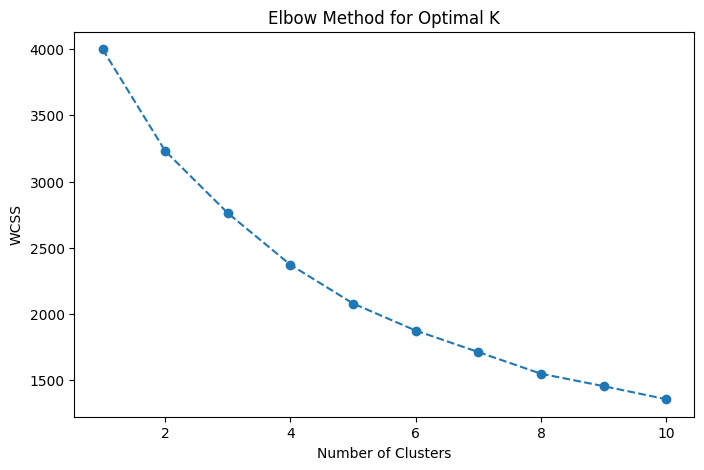

In [22]:
# Elbow Method to determine optimal k
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [23]:
# Applying K-Means with optimal k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

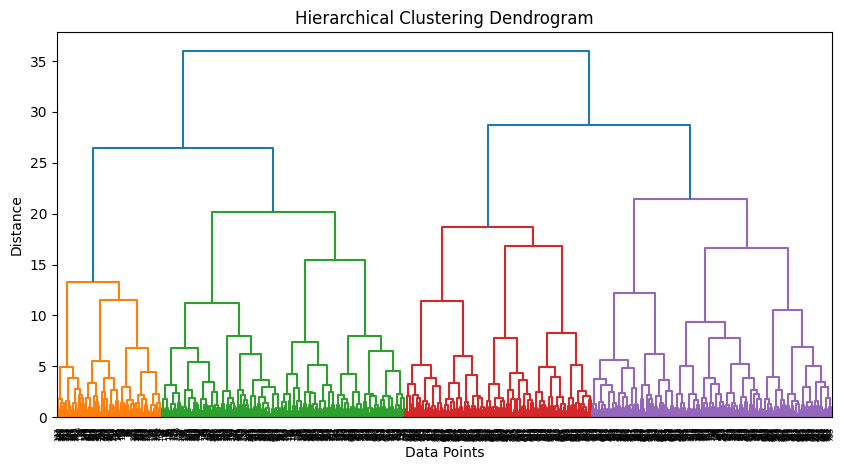

In [24]:
# Hierarchical Clustering
linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [25]:
# Assigning clusters from Hierarchical Clustering
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, 3, criterion='maxclust')

In [26]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

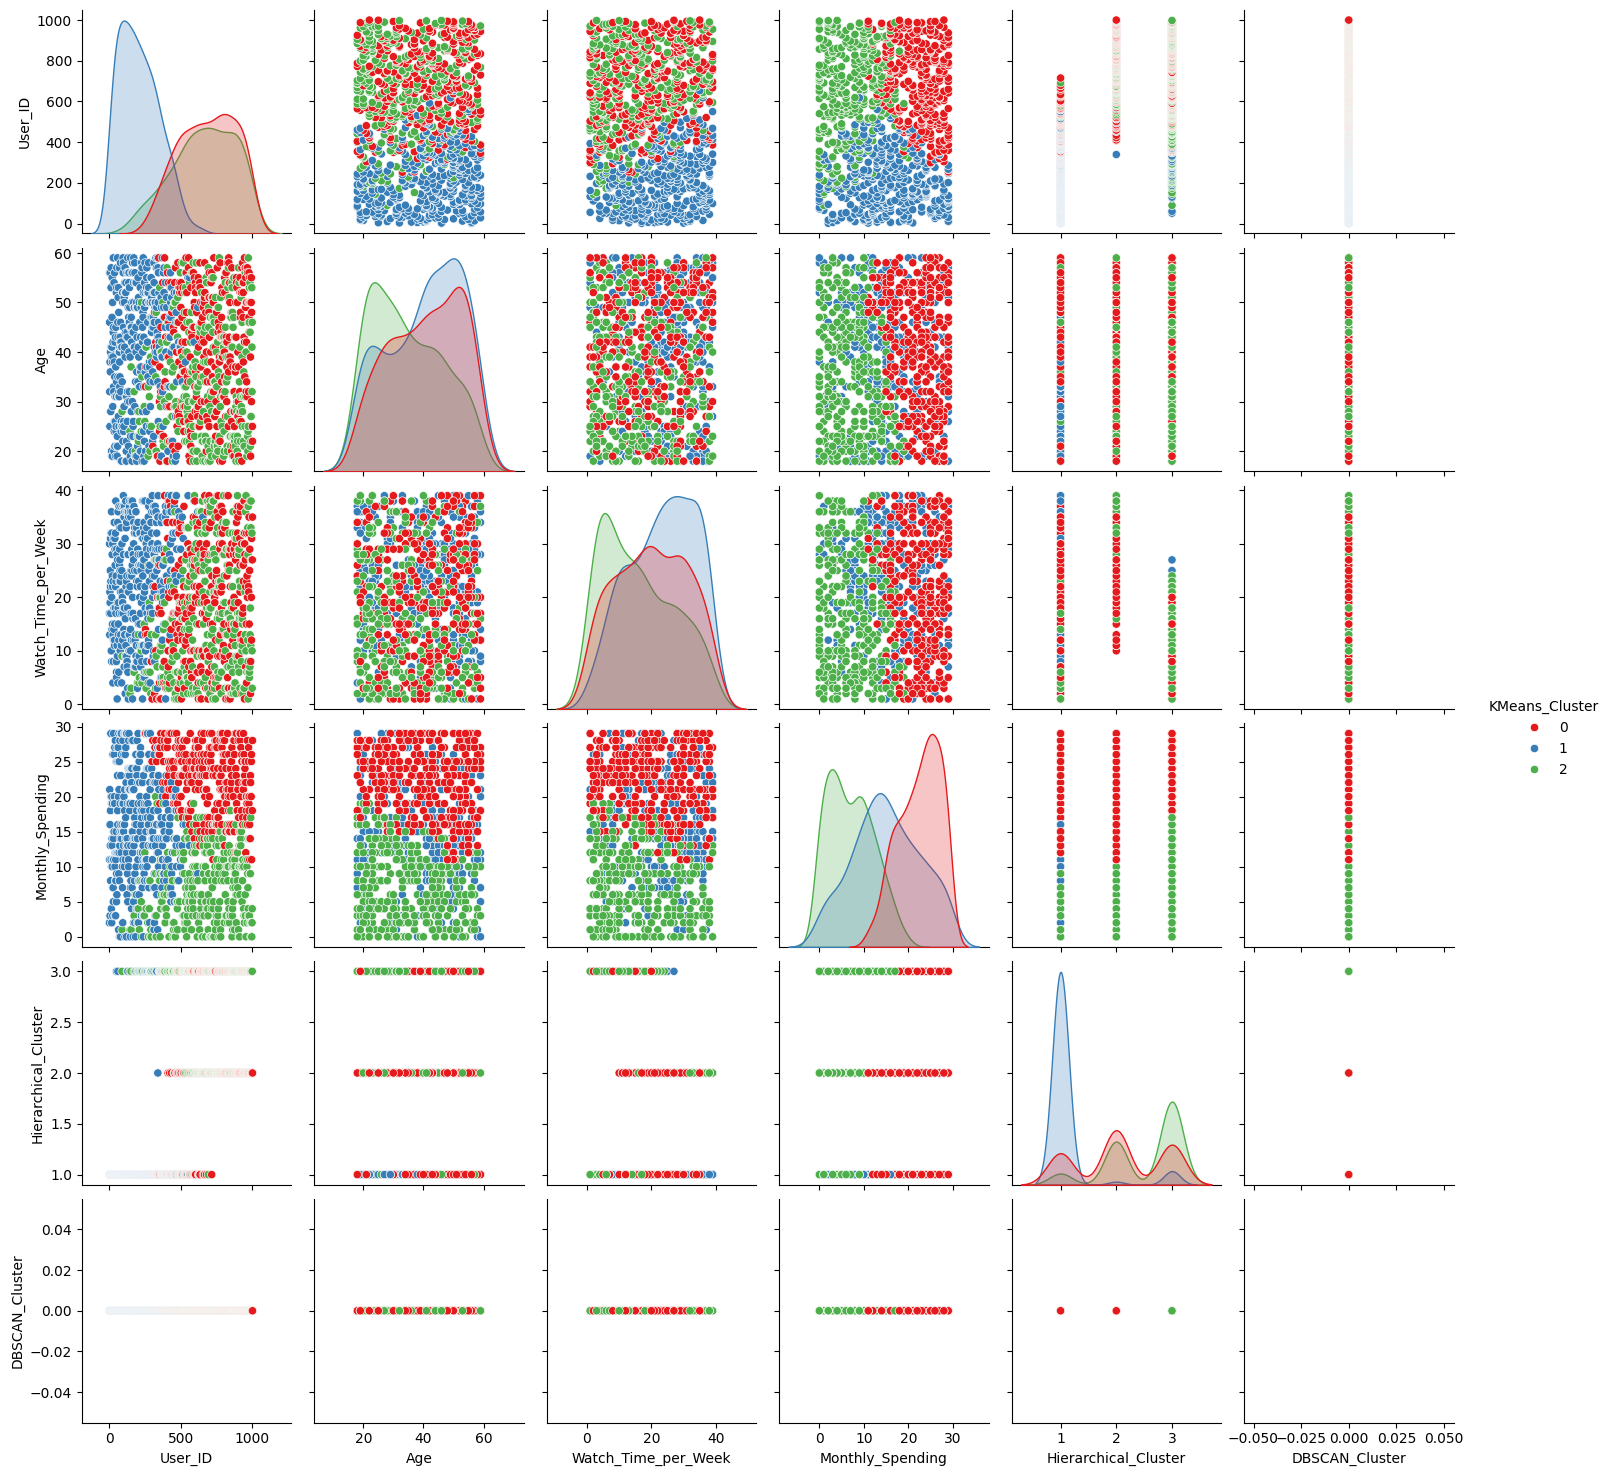

In [27]:
# Visualizing Clusters (K-Means)
sns.pairplot(df, hue='KMeans_Cluster', palette='Set1')
plt.show()

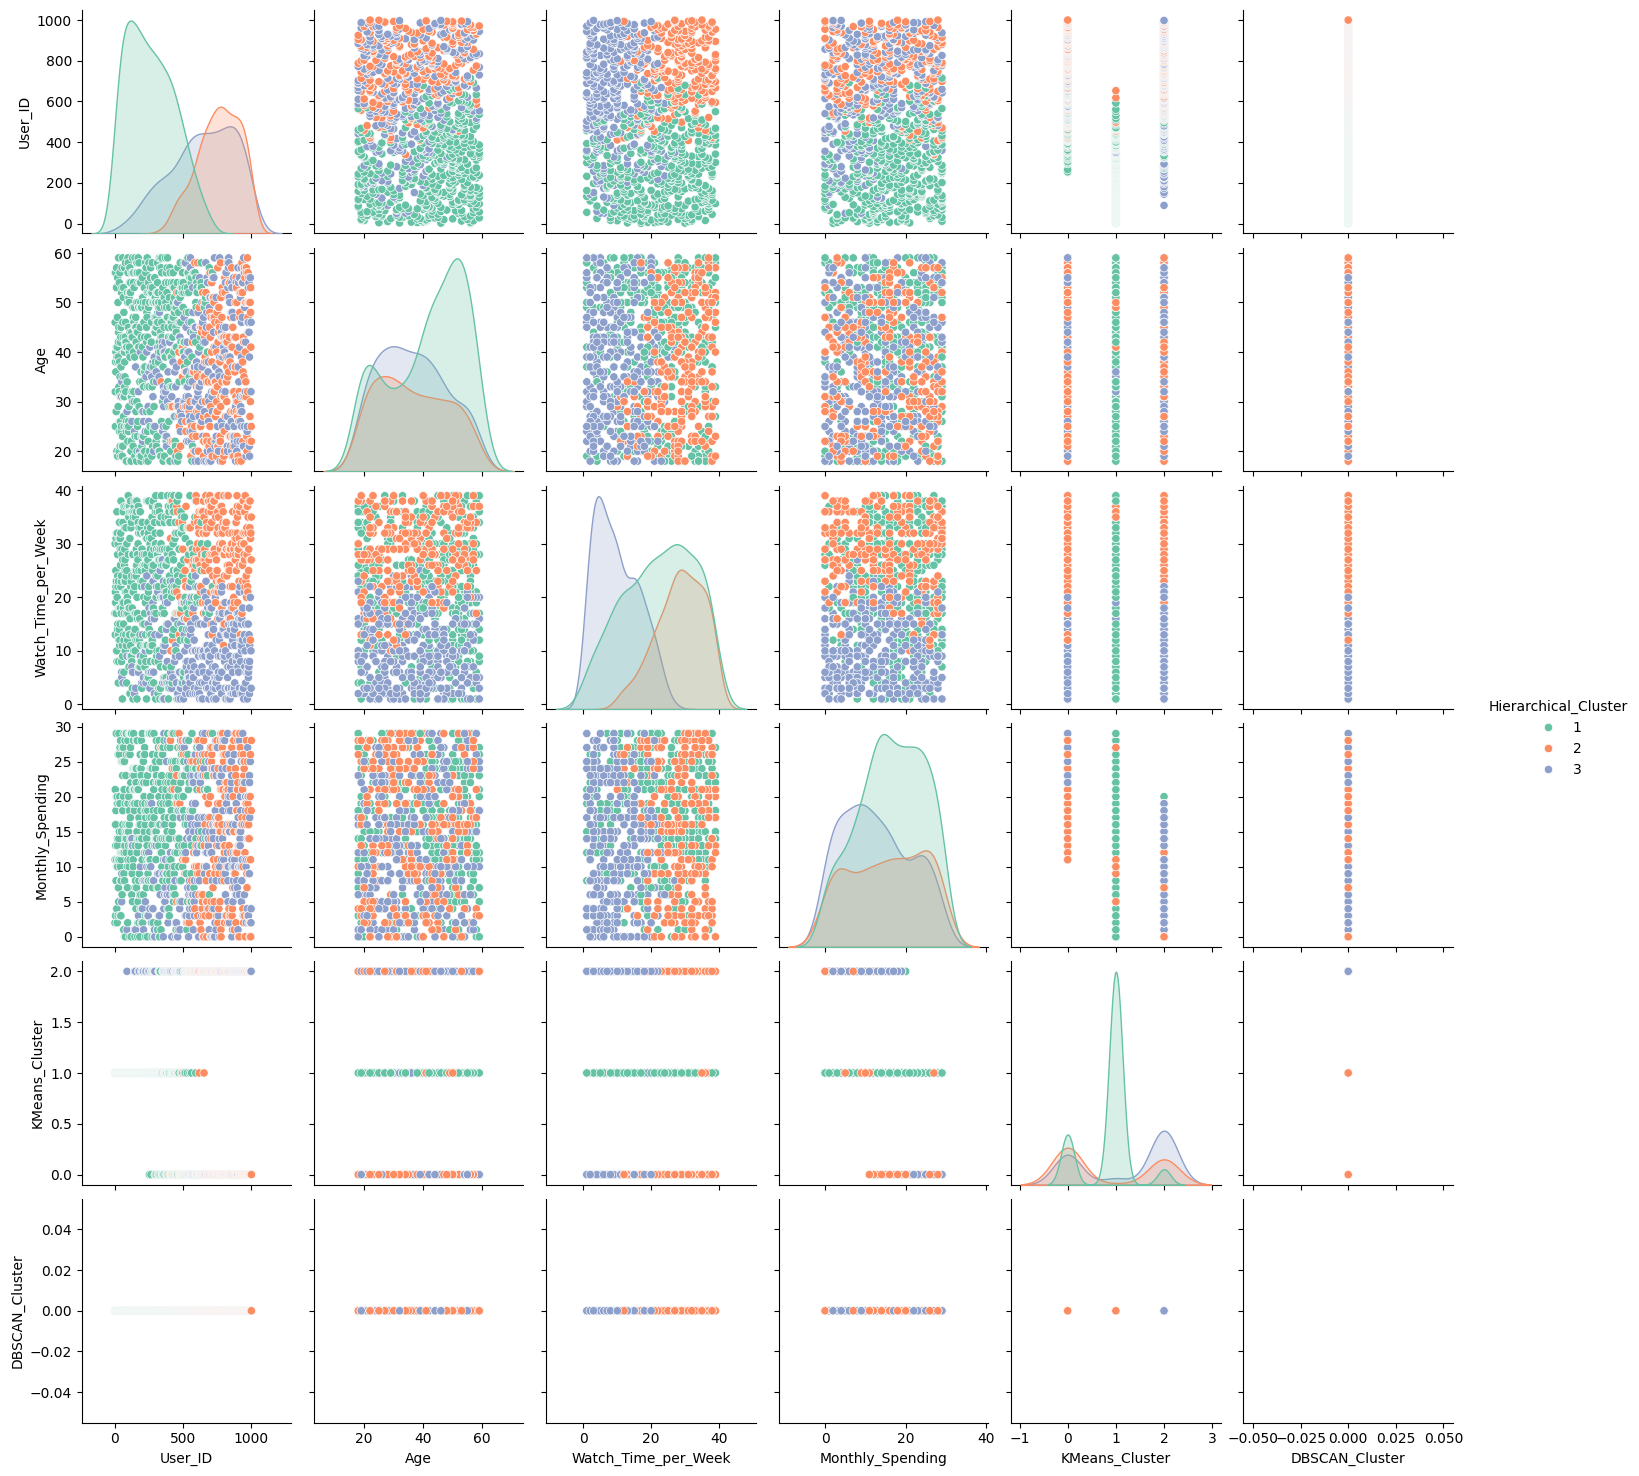

In [28]:
# Visualizing Clusters (Hierarchical)
sns.pairplot(df, hue='Hierarchical_Cluster', palette='Set2')
plt.show()

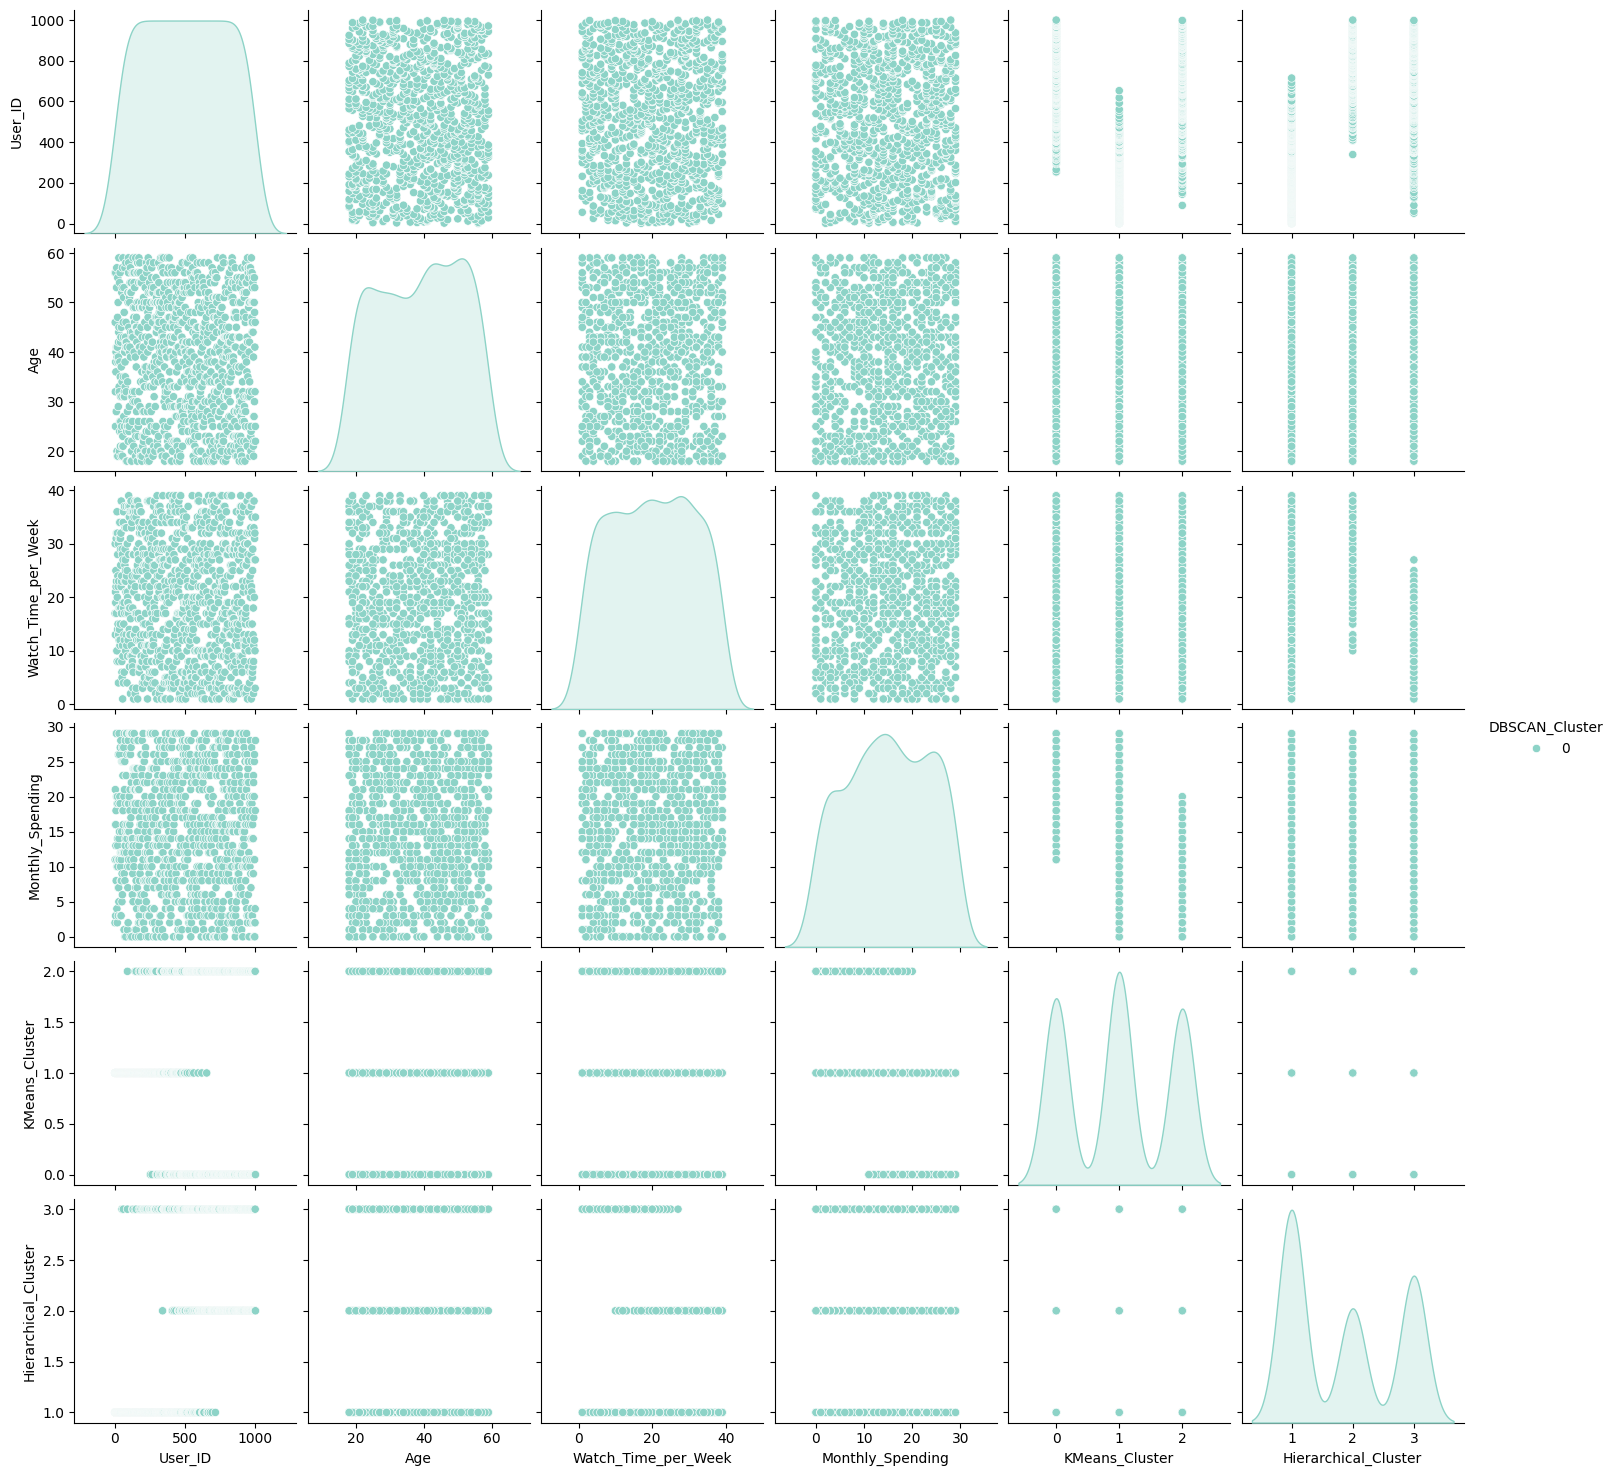

In [29]:
# Visualizing Clusters (DBSCAN)
sns.pairplot(df, hue='DBSCAN_Cluster', palette='Set3')
plt.show()

In [31]:
# Displaying final dataset with cluster labels
print(df.head())

   User_ID  Age  Gender         Region  Watch_Time_per_Week Preferred_Genre  \
0        1   56  Female  North America                   17          Sci-Fi   
1        2   46    Male  North America                   30          Sci-Fi   
2        3   32  Female         Europe                   13          Action   
3        4   25    Male  South America                   21          Comedy   
4        5   38  Female         Africa                   19          Horror   

  Subscription_Type Binge_Watching_Frequency Platform_Usage  Monthly_Spending  \
0             Basic                Sometimes        Disney+                 2   
1              Free                Sometimes        HBO Max                11   
2              Free                Sometimes   Amazon Prime                21   
3             Basic                   Rarely        Netflix                16   
4           Premium                Sometimes           Hulu                 3   

   KMeans_Cluster  Hierarchical_Cluste